<a href="https://colab.research.google.com/github/nicolassalomon96/IA_Identificacion_y_Control/blob/main/TP3/TP3_Perceptr%C3%B3n_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Nº3 - Perceptrón Multicapa con Back-propagation

#Punto 1. Clasificador con redes multicapas

##Importamos la librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

##Visualizamos un ejemplo de los Clusters a Clasificar

In [ ]:
#Cantidad de muestras de cada cluster
samples_A = 1000 
samples_B = 1000

cluster_A = []
cluster_B = []

for i in range(samples_A//2):
  cluster_A.append((np.random.uniform(1,2), np.random.uniform(1,2)))
for i in range(samples_A//2):
  cluster_A.append((np.random.uniform(-1,-2), np.random.uniform(-1,-2)))

cluster_A = np.array(cluster_A)

for i in range(samples_B//2):
  cluster_B.append((np.random.uniform(-1,-2), np.random.uniform(1,2)))
for i in range(samples_B//2):
  cluster_B.append((np.random.uniform(1,2), np.random.uniform(-1,-2)))
cluster_B = np.array(cluster_B)

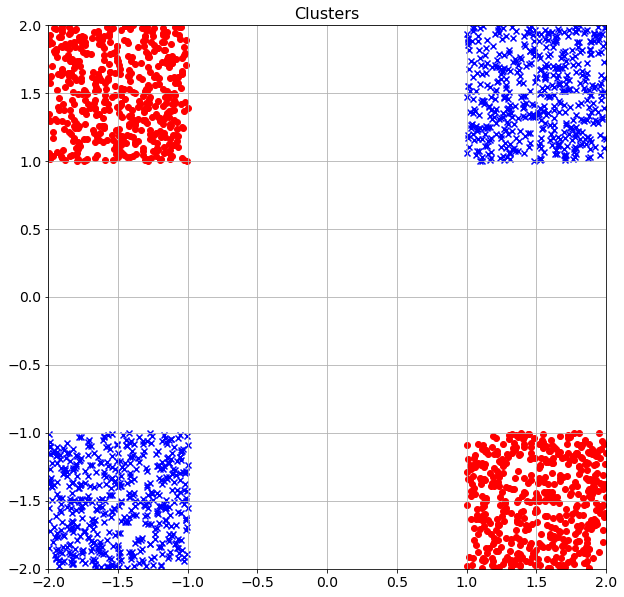

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(cluster_A[:,0], cluster_A[:,1], marker='x', color='blue')
plt.scatter(cluster_B[:,0], cluster_B[:,1], marker='o', color='red')
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.title('Clusters', fontsize=16)
plt.grid()

##Creamos la Neurona

In [ ]:
class MLP:
    def __init__(self, lr=0.1, iterations=100, finite = False, loss_threshold=0.005, num_input=2, num_hidden=2, num_output=1):
        self.lr = lr
        self.iterations = iterations
        self.finite = finite #Muestras de entrenamiento finita o infinitas
        self.loss_threshold = loss_threshold #Umbral máximo de error tolerable para detener el entrenamiento
        self.num_input = num_input
        self.num_hidden = num_hidden
        self.num_output = num_output
    
    #Generamos los pesos y bias inciales
    def load_weights(self):
      # - weights_01: pesos entre la capa de entrada y la oculta
      # - weights_12: pesos entre la capa oculta y de salida
      self.weights_01 = np.random.uniform(size=(self.num_input, self.num_hidden))
      self.weights_12 = np.random.uniform(size=(self.num_hidden, self.num_output))

      # - b01: bias para la capa oculta
      # - b12: bias para la capa de salida
      self.b01 = np.random.uniform(size=(1,self.num_hidden))
      self.b12 = np.random.uniform(size=(1,self.num_output))

      self.weights_01_saved = [] #Vector para ir guardando los pesos
      self.weights_12_saved = []
      self.bias_01_saved = []  #Vector para ir guardando los bias
      self.bias_12_saved = []

      self.weights_01_saved.append(np.copy(self.weights_01))
      self.weights_12_saved.append(np.copy(self.weights_12))
      self.bias_01_saved.append(np.copy(self.b01))
      self.bias_12_saved.append(np.copy(self.b12))

    def sigmoid(self, x):
      result = 1 / (1 + np.exp(-x))
      return result

    def derivate_sigmoid(self, x):
        result = self.sigmoid(x) * (1 - self.sigmoid(x))
        return result

    def get_point(self, n_cluster):
      cluster = n_cluster % 2 
      if cluster == 0:
        aux = np.random.randint(2)
        if aux == 0:
          self.point = np.array((np.random.uniform(1,2), np.random.uniform(1,2))) #Genero un punto aleatorio para el cluster 0
        else:
          self.point = np.array((np.random.uniform(-1,-2), np.random.uniform(-1,-2))) 
      else:
        aux_1 = np.random.randint(2)
        if aux_1 == 0:
          self.point = np.array((np.random.uniform(-1,-2), np.random.uniform(1,2))) #Genero un punto aleatorio para el cluster 1
        else:
          self.point = np.array((np.random.uniform(1,2), np.random.uniform(-1,-2)))

    #Calculo de la salida de la neurona
    def forward(self, datapoint):
        self.v11 = datapoint[0] * self.weights_01[0][0] + datapoint[1] * self.weights_01[0][1] + self.b01[0][0]
        self.v21 = datapoint[0] * self.weights_01[1][0] + datapoint[1] * self.weights_01[1][1] + self.b01[0][1]
        self.y1 = self.sigmoid(self.v11)
        self.y2 = self.sigmoid(self.v21)
        self.v12 = self.y1 * self.weights_12[0] + self.y2 * self.weights_12[1] + self.b12
        self.y = self.sigmoid(self.v12)
        return self.y
    
    #Entrenamiento de la Neurona
    def train(self, train_points, train_labels):
      n_cluster = 1 #Variable para determinar el cluster
      self.losses = [] #Vector para ir guardando los errores
      error = 0
      self.load_weights()

      for i in range(self.iterations):
        #print(f"Iteración: {i}")
        
        if self.finite == False:
          cluster = n_cluster % 2 
          self.get_point(n_cluster)
        else:
          cluster = train_labels[i%len(train_labels)]
          self.point = train_points[i%len(train_points)]

        y = self.forward(self.point)
        error = (cluster - y)[0][0]
        loss = 0.5 * ((error) ** 2)
        self.losses.append(loss)  
        
        #Actualizo los pesos y bias
        self.weights_01[0][0] += self.lr * error * self.derivate_sigmoid(self.v12) * self.weights_12[0][0] * self.derivate_sigmoid(self.v11) * self.point[0]
        self.weights_01[0][1] += self.lr * error * self.derivate_sigmoid(self.v12) * self.weights_12[0][0] * self.derivate_sigmoid(self.v11) * self.point[1]
        self.weights_01[1][0] += self.lr * error * self.derivate_sigmoid(self.v12) * self.weights_12[1][0] * self.derivate_sigmoid(self.v21) * self.point[0]
        self.weights_01[1][1] += self.lr * error * self.derivate_sigmoid(self.v12) * self.weights_12[1][0] * self.derivate_sigmoid(self.v21) * self.point[1]

        self.weights_12[0] += self.lr * error * self.derivate_sigmoid(self.v12)[0][0] * self.sigmoid(self.v11)
        self.weights_12[1] += self.lr * error * self.derivate_sigmoid(self.v12)[0][0] * self.sigmoid(self.v21)

        self.b01[0][0] += self.lr * error * self.derivate_sigmoid(self.v12)[0][0] * self.weights_12[0][0] * self.derivate_sigmoid(self.v11)
        self.b01[0][1] += self.lr * error * self.derivate_sigmoid(self.v12)[0][0] * self.weights_12[1][0] * self.derivate_sigmoid(self.v21)

        self.b12 += self.lr * error * self.derivate_sigmoid(self.v12)

        self.weights_01_saved.append(np.copy(self.weights_01))
        self.weights_12_saved.append(np.copy(self.weights_12))
        self.bias_01_saved.append(np.copy(self.b01))
        self.bias_12_saved.append(np.copy(self.b12))

        if (self.finite == False) and (loss <= self.loss_threshold):
          print("Umbral de pérdida alcanzado")
          break
        if self.finite == False:
          n_cluster += 1
        #clear_output(wait=True)

      self.weights_01_saved = np.array((self.weights_01_saved))
      self.weights_12_saved = np.array((self.weights_12_saved))
      self.bias_01_saved = np.array((self.bias_01_saved))
      self.bias_12_saved = np.array((self.bias_12_saved))
      self.losses = np.array((self.losses)) 

      print(f"Entrenamiento completado con {i+1} iteraciones")

    #Clasificación de un punto una vez que la red esta entrenada
    def classify(self, datapoint):
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
          return 1
        else:
          return 0

##Entrenamiento con conjunto infinito

In [ ]:
mlp = MLP(lr=0.05, iterations=200000, loss_threshold=0.005) #Creamos la clase Neurona
inicio = time.time()
mlp.train(_,_) #Entrenamos la Neurona
fin = time.time()
print(f"Tiempo de entrenamiento: {round(fin - inicio,4)} segundos")

Umbral de pérdida alcanzado
Entrenamiento completado con 16031 iteraciones
Tiempo de entrenamiento: 3.9482 segundos


In [ ]:
print("(1.5,1.5)", "Cluster:", mlp.classify((1.5,1.5)))
print("(-1.5,1.5)", "Cluster:", mlp.classify((-1.5,1.5)))
print("(-1.5,-1.5)", "Cluster:", mlp.classify((-1.5,-1.5)))
print("(1.5,-1.5)", "Cluster:", mlp.classify((1.5,-1.5)))

(1.5,1.5) Cluster: 0
(-1.5,1.5) Cluster: 1
(-1.5,-1.5) Cluster: 0
(1.5,-1.5) Cluster: 1


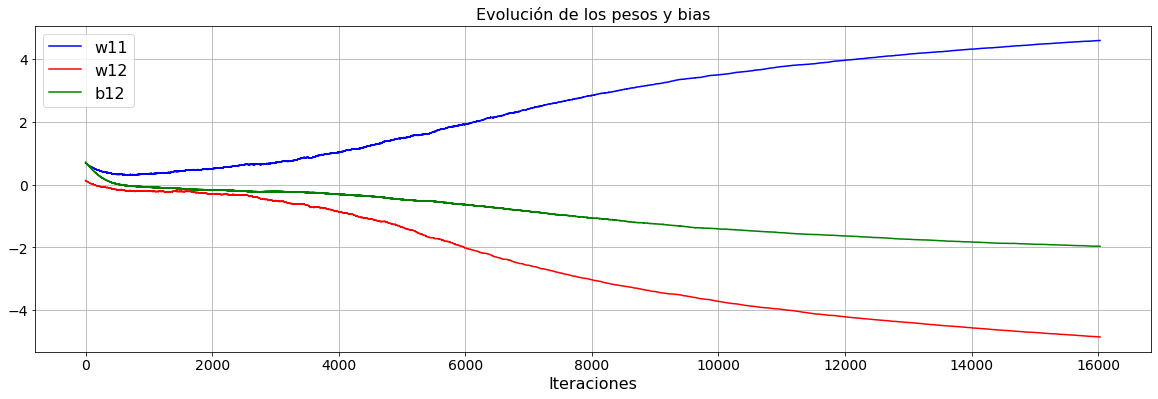

In [ ]:
#Grafica de la evolución de pesos y bias en función de las iteraciones
fig1 = plt.figure(figsize=(20,6))
plt.plot(np.array((mlp.weights_12_saved))[:,0], color='blue', label='w11')
plt.plot(np.array((mlp.weights_12_saved))[:,1], color='red', label='w12')
plt.plot(mlp.bias_12_saved[:,0], color='green', label='b12')
plt.grid()
plt.legend(fontsize=16)
plt.title('Evolución de los pesos y bias', fontsize=16)
plt.xlabel('Iteraciones', fontsize=16)
plt.show()

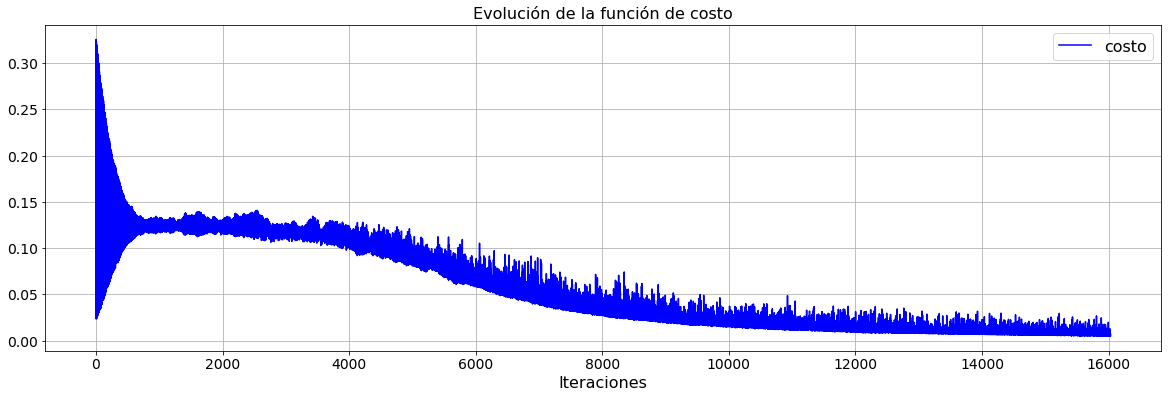

In [ ]:
#Grafica de la evolución del error en función de las iteraciones
fig2 = plt.figure(figsize=(20,6))
plt.plot(mlp.losses, color='blue', label='costo')
plt.grid()
plt.legend(fontsize=16)
plt.title('Evolución de la función de costo', fontsize=16)
plt.xlabel('Iteraciones', fontsize=16) #Dado que realizamos iteraciones alternadas entre el cluster A y B, la cantidad de coeficientes de error para cada cluster serán las iteraciones totales/2
plt.show()

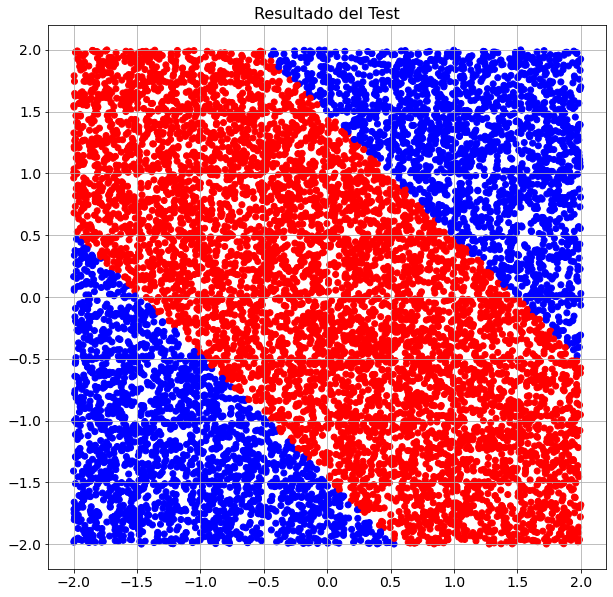

In [ ]:
n_points = 10000
points = []
results = []
for i in range (n_points):
  point = np.array((np.random.uniform(-2,2), np.random.uniform(-2,2)))
  points.append(point)
  out_mlp = mlp.classify(point)
  results.append(out_mlp)
points = np.array(points)
results = np.array(results)

fig3 = plt.figure(figsize=(10,10))
colormap = np.array(['b','r'])
plt.scatter(points[:,0], points[:,1], c=colormap[results])
plt.grid()
plt.title('Resultado del Test', fontsize=16)
plt.show()

## Entrenamiento con conjunto finito

In [ ]:
#Cantidad de muestras de cada cluster
samples_A = 100
samples_B = 100
train_perc = 0.8

cluster_A = []
cluster_B = []

for i in range(samples_A//2):
  cluster_A.append(((np.random.uniform(1,2), np.random.uniform(1,2)),0))
for i in range(samples_A//2):
  cluster_A.append(((np.random.uniform(-1,-2), np.random.uniform(-1,-2)),0))

cluster_A = np.array(cluster_A, dtype=object)

for i in range(samples_B//2):
  cluster_B.append(((np.random.uniform(-1,-2), np.random.uniform(1,2)),1))
for i in range(samples_B//2):
  cluster_B.append(((np.random.uniform(1,2), np.random.uniform(-1,-2)),1))
cluster_B = np.array(cluster_B, dtype=object)

cluster_merged = np.vstack((cluster_A, cluster_B))
np.random.shuffle(cluster_merged) #Mezclamos las muestras para dar un poco de aleatoreidad al orden en que se irán sucediendo los puntos de cada cluster

train_points_labels = cluster_merged[0:int(len(cluster_merged)*train_perc)]
test_points_labels = cluster_merged[int(len(cluster_merged)*train_perc):]

train_points = train_points_labels[:,0]
train_labels = train_points_labels[:,1]

test_points = test_points_labels[:,0]
test_labels = test_points_labels[:,1]

print(len(train_points))
print(len(test_points))

160
40


In [ ]:
mlp_finite = MLP(lr=0.05, iterations=20000, finite = True) #Creamos la clase Neurona
inicio = time.time()
mlp_finite.train(train_points, train_labels) #Entrenamos la Neurona
fin = time.time()
print(f"Tiempo de entrenamiento: {round(fin - inicio,4)} segundos")

Entrenamiento completado con 20000 iteraciones
Tiempo de entrenamiento: 4.4603 segundos


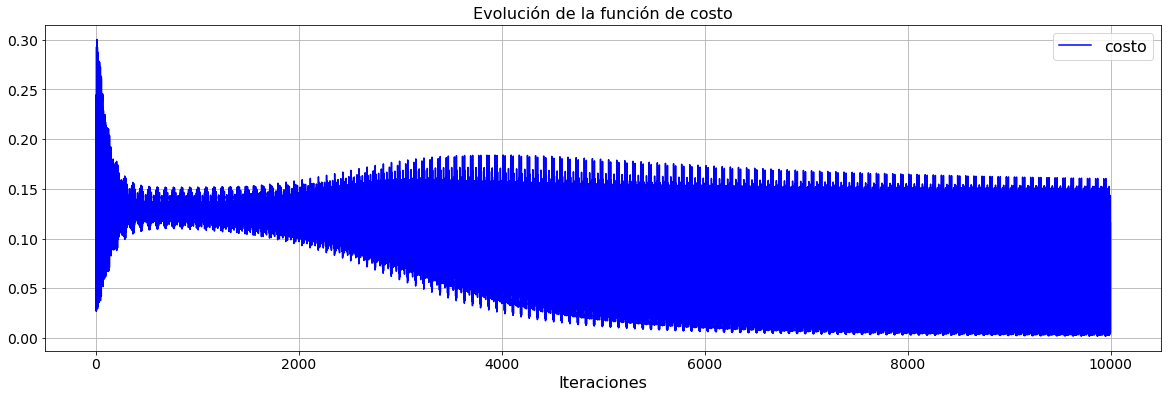

In [ ]:
muestras = []
for i in range(len(mlp_finite.losses)):
  if i%2 == 1:
    muestras.append(mlp_finite.losses[i])

#Grafica de la evolución del error en función de las iteraciones
fig2 = plt.figure(figsize=(20,6))
plt.plot(muestras, color='blue', label='costo')
plt.grid()
plt.legend(fontsize=16)
plt.title('Evolución de la función de costo', fontsize=16)
plt.xlabel('Iteraciones', fontsize=16) #Dado que realizamos iteraciones alternadas entre el cluster A y B, la cantidad de coeficientes de error para cada cluster serán las iteraciones totales/2
plt.show()

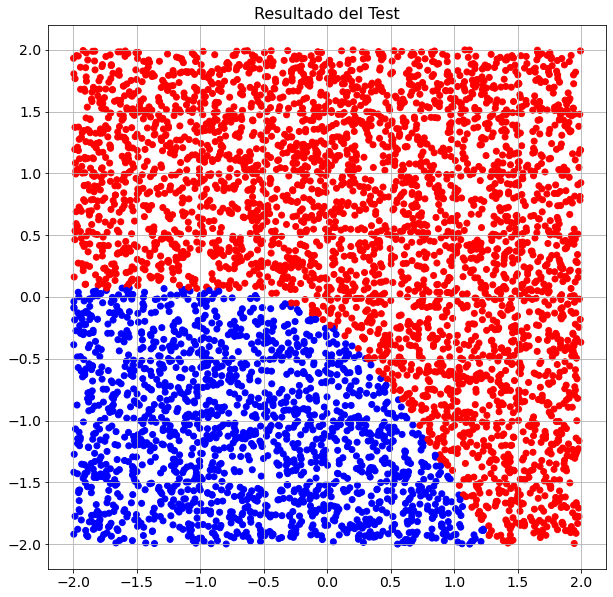

In [ ]:
n_points = 5000
points = []
results = []
for i in range (n_points):
  point = np.array((np.random.uniform(-2,2), np.random.uniform(-2,2)))
  points.append(point)
  out_mlp = mlp_finite.classify(point)
  results.append(out_mlp)
points = np.array(points)
results = np.array(results)

fig3 = plt.figure(figsize=(10,10))
colormap = np.array(['b','r'])
plt.scatter(points[:,0], points[:,1], c=colormap[results])
plt.grid()
plt.title('Resultado del Test', fontsize=16)
plt.show()

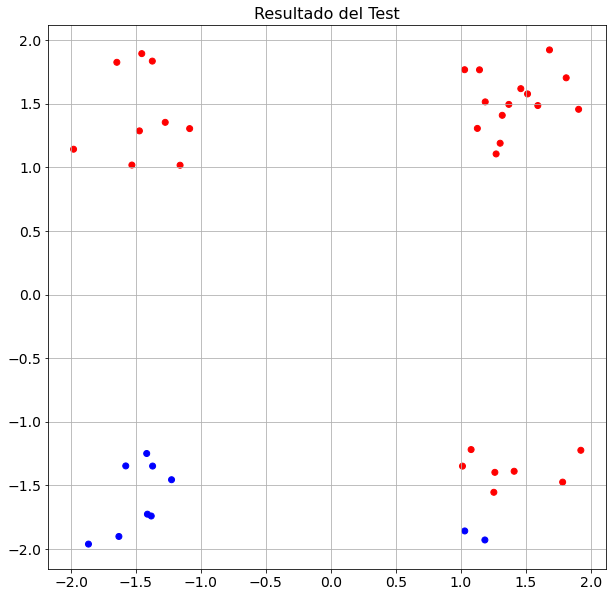

In [ ]:
#Resultados sobre el test de prueba
results = []

for i in test_points:
  point = i
  out_mlp = mlp_finite.classify(point)
  results.append(out_mlp)

results = np.array(results)

x = []
y = []
for i in test_points:
  x.append(i[0])
  y.append(i[1])

fig3 = plt.figure(figsize=(10,10))
colormap = np.array(['b','r'])
plt.scatter(x,y, c=colormap[results])
plt.grid()
plt.title('Resultado del Test', fontsize=16)
plt.show()

##Conclusiones

En los resultados obtenidos observamos el correcto funcionamiento del clasificador empleando una red neuronal multicapa con 1 capa oculta y un set de entrenamiento infinito, con valores en la función de costo decrecientes.

Sin embargo, en el caso de la red neuronal entrenada con un conjunto finito, observamos como el valor del costo comienza a aumentar debido a un sobreentrenamiento. Por esto, la red no logra clasificar correctamente los puntos de prueba.

Para evitar este sobreentrenamiento se debe detener el entrenamiento antes de que la función de costo comience a aumentar, es decir alrededor de la época 1600.